In [32]:
# !pip install --upgrade pip

In [33]:
# !pip install yfinance

In [34]:
# import libraries

import numpy as np 
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import StandardScaler # use it because kmean is sentsitive for the wide range of features, then we apply it for normalization

import matplotlib.pyplot as plt 
%matplotlib inline

In [35]:
start = "2010-01-01"
end = "2023-12-31"

In [36]:
aapl_df = yf.download("AAPL", start = start, end = end, progress = False) # raw data
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [37]:
aapl_df.shape

(3522, 6)

In [38]:
aapl_df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=3522, freq=None)

In [39]:
type(aapl_df)

pandas.core.frame.DataFrame

In [40]:
stock = aapl_df.copy()
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [41]:
stock.shape

(3522, 6)

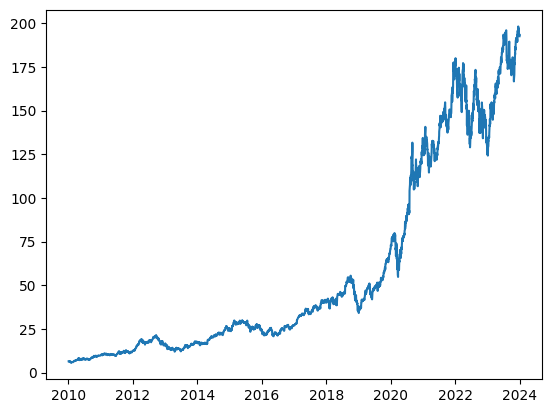

In [42]:
# plot 

plt.plot(stock['Adj Close'])

In [43]:
# get feature for clustering

# calculate log return
stock['Log Rets'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626


In [44]:
stock.shape

(3522, 7)

In [45]:
stock.dropna(inplace = True)

In [46]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861


In [47]:
stock.shape

(3521, 7)

In [48]:
# prepare features to be used for clustering

stock['Rets Mean'] = stock['Log Rets'].rolling(5).mean() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean
Date,,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626,NaN
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678


In [49]:
stock['Rets STD'] = stock['Log Rets'].rolling(5).std() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728,NaN,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034,NaN,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850,NaN,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626,NaN,NaN
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678,0.00892


In [50]:
stock.dropna(inplace = True)
stock.head()

# or we can use
# stock = stock.dropna()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678,0.008920
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.288572,594459600,-0.011440,-0.006312,0.008869
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.377276,605892000,0.014007,-0.000304,0.010636
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.340341,432894000,-0.005809,-0.001095,0.010923
2010-01-15,7.533214,7.557143,7.352500,7.354643,6.234381,594067600,-0.016853,-0.005791,0.011786


In [51]:
stock.shape

(3517, 9)

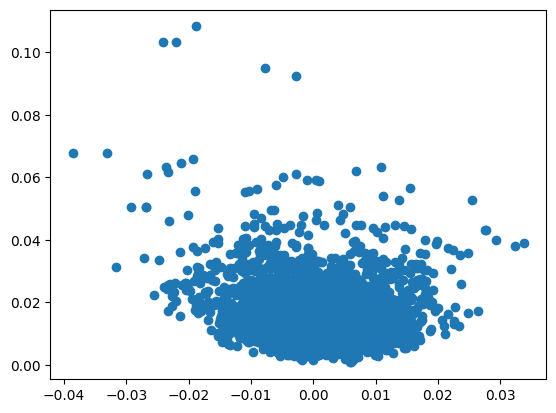

In [52]:
# plot

plt.scatter(stock['Rets Mean'], stock['Rets STD']); # plot X and y

In [53]:
# get array X in order to perform clustering

X1 = stock['Rets Mean']
X1

Date
2010-01-11   -0.003678
2010-01-12   -0.006312
2010-01-13   -0.000304
2010-01-14   -0.001095
2010-01-15   -0.005791
                ...   
2023-12-22   -0.004060
2023-12-26   -0.002921
2023-12-27   -0.003886
2023-12-28   -0.001287
2023-12-29   -0.002221
Name: Rets Mean, Length: 3517, dtype: float64

In [54]:
type(X1)

pandas.core.series.Series

In [55]:
X2 = stock['Rets STD']
X2

Date
2010-01-11    0.008920
2010-01-12    0.008869
2010-01-13    0.010636
2010-01-14    0.010923
2010-01-15    0.011786
                ...   
2023-12-22    0.006455
2023-12-26    0.005950
2023-12-27    0.004484
2023-12-28    0.003023
2023-12-29    0.003506
Name: Rets STD, Length: 3517, dtype: float64

In [56]:
type(X2)

pandas.core.series.Series

In [57]:
X1 = stock['Rets Mean'].values
X1

array([-0.00367825, -0.00631186, -0.00030361, ..., -0.00388641,
       -0.0012873 , -0.00222103])

In [59]:
X2 = stock['Rets STD'].values
X2

array([0.00892013, 0.00886882, 0.01063564, ..., 0.0044836 , 0.00302329,
       0.00350608])

In [60]:
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [61]:
X = np.array(list(zip(X1, X2)))
X

array([[-0.00367825,  0.00892013],
       [-0.00631186,  0.00886882],
       [-0.00030361,  0.01063564],
       ...,
       [-0.00388641,  0.0044836 ],
       [-0.0012873 ,  0.00302329],
       [-0.00222103,  0.00350608]])

In [63]:
type(X)

numpy.ndarray

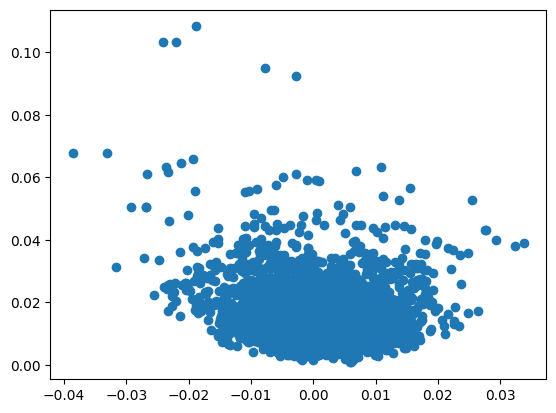

In [64]:
# plot 

plt.scatter(X[:, 0], X[:, 1]); # not need to use stock dataframe

In [65]:
# feature X are not bad but require normalization for kmean - better

def normalizedFeature(x):
    sc = StandardScaler()
    x = sc.fit_transform(x)

    return x


In [66]:
# call a function and keep data in X_norm
X_norm = normalizedFeature(X)
X_norm

array([[-0.61053712, -0.65389111],
       [-0.95664171, -0.65924055],
       [-0.16704792, -0.47503704],
       ...,
       [-0.63789395, -1.11643065],
       [-0.29632331, -1.26867845],
       [-0.41903249, -1.21834478]])

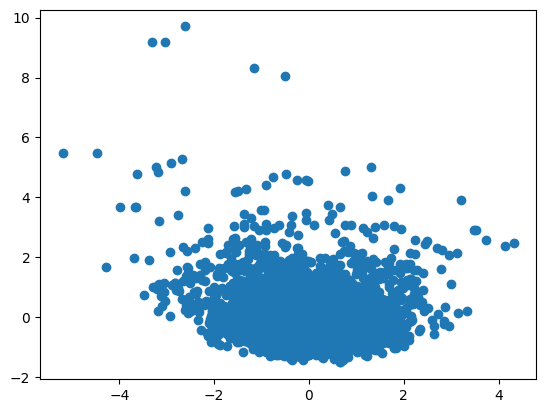

In [67]:
# plot 

plt.scatter(X_norm[:, 0], X_norm[:, 1]);